# Analisis Retensi Karyawan


**Praproses Data**

Pada kesempatan kali ini saya akan memberikan data agar dapat digunakan baik untuk analisis. pada kesempatan kali ini kasus yang ditangani :
1. Menangani nilai yang hilang
2. Mengonversi data kategorikal ke nilai numerik
3. Menormalisasi data


Pertama-tama kita mengimport library yan kita butuhkan.
- Salah satu fungsi yang digunakan yaitu pandas itu melakukan manipulasi data, seperti membersihkan data, pada dataset tabular.
- Kemudian ada numpy untuk membantu melakukan operasi matematika pada array.matriks.
- Yang terahkir, ada matplotlib.pyplot ini library yang fungsinya untuk melakukan visualisati data sederhana yang dibangun diaatas libary numpay

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


membaca file excel melalui python, kita gunakan fungsi *read_excel* dari libary pandas
Dataset yang digunakan bersumber dari *https://s.id/dtasetAI*

In [97]:
datat = pd.read_excel('data_karyawan.xlsx')
# Melihat struktur data
data.shape #Memeriksa ukuran dataset
data.head(10) #Memeriksa isi data dengan menampilkan beberapa  baris paling atas

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,-0.857969,-0.586170,1.664279,1.353832,0.701008,1.165364,0.466344,-0.627650,1.386385,...,-0.983392,-0.447122,-1.208923,-0.081620,-1.016359,-0.466229,0.161056,-1.952133,0.754471,0.849984
1,EID_9658,1.165543,1.925552,-1.150702,1.353832,-0.148355,-0.910524,1.365464,2.735821,-0.352392,...,-2.415053,-0.447122,-1.208923,1.136585,-1.016359,0.695473,-1.771615,-0.889073,0.754471,-1.364477
2,EID_22203,1.165543,0.936086,-0.212375,-0.738644,0.701008,1.461920,1.365464,0.757309,0.516996,...,0.925489,0.911912,-1.208923,1.136585,-0.127422,0.695473,0.161056,-1.952133,1.622012,-0.257247
3,EID_7652,1.165543,0.783860,1.664279,1.353832,1.550372,-0.317413,-1.331897,-0.231948,1.386385,...,-1.937833,-3.165192,1.418535,-0.081620,-0.127422,0.695473,0.161056,-0.889073,0.754471,-0.257247
4,EID_6516,-0.857969,0.327184,-0.212375,-0.738644,-0.997719,1.165364,0.466344,-0.133022,1.386385,...,-1.937833,-0.447122,1.418535,1.136585,1.650556,0.695473,0.161056,-0.889073,-0.113069,0.849984
5,EID_20283,-0.857969,-1.347298,0.725952,-0.738644,-0.997719,-0.910524,-0.432777,-1.023353,-1.221780,...,-0.028951,-0.447122,-1.208923,-0.081620,-0.127422,-0.466229,0.161056,0.173988,0.754471,-0.257247
6,EID_21014,1.165543,0.174958,-0.212375,-0.738644,1.550372,0.572253,-1.331897,-0.726576,1.386385,...,-0.983392,-0.447122,-1.208923,-0.081620,0.761515,1.857276,0.161056,0.173988,-0.113069,-0.257247
7,EID_7693,-0.857969,0.098845,-1.150702,-0.738644,0.701008,1.461920,0.466344,-0.924427,1.386385,...,0.925489,-0.447122,-1.208923,-0.081620,-0.127422,1.857276,0.161056,-0.889073,-0.113069,1.957214
8,EID_13232,1.165543,-0.662283,-2.089029,1.353832,0.701008,-0.910524,-1.331897,-0.627650,0.516996,...,0.925489,-0.447122,0.542716,-0.081620,1.650556,0.695473,0.161056,-0.889073,-0.113069,0.849984
9,EID_6515,1.165543,0.631635,-1.150702,1.353832,0.701008,1.165364,0.466344,0.262681,-1.221780,...,-0.983392,-3.165192,0.542716,-0.081620,-0.127422,-0.466229,0.161056,1.237048,-0.113069,0.849984


In [98]:
# Memeriksa informasi umum tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   float64
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   float64
 4   Relationship_Status        3000 non-null   float64
 5   Hometown                   3000 non-null   float64
 6   Unit                       3000 non-null   float64
 7   Decision_skill_possess     3000 non-null   float64
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   float64
 10  growth_rate                3000 non-null   float64
 11  Travel_Rate                3000 non-null   float64
 12  Post_Level                 3000 non-null   float64
 13  Pay_Scale                  3000 non-null   float

In [104]:
# Asumsikan kolom target bernama 'Time_of_service'
kolom_target = 'Time_of_service'  # Ganti berdasarkan nama kolom yang benar dalam dataset


1. Pembersihan Data

Memeriksa dan menangani nilai yang hilang, serta memastika tipe data sesuai apa tidak

In [99]:
# Check for missing values
print(data.isnull().sum())

# Mengisi nilai yang hilang dengan metode yang sesuai (mean/median/mode)
data = data.fillna(method='ffill')  # Contoh pengisian dengan forward fill


Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64


3.Normalisasi Data

In [117]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik yang perlu dinormalisasi
numeric_features = ['Age', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [116]:
from sklearn.preprocessing import LabelEncoder

# Encoding kolom kategorikal
categorical_features = ['Gender', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Post_Level', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']
encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])


Distribusi Data

Membagi data menjadi traning set dan test set

In [140]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Algoritma Classification
pemilihan model Untuk menyelesaikan permasaalahan saya memilik algorima Classification, kita bisa menggunakan model seperti Decision Tree

Membagi Data Menjadi Training dan Testing Set

In [141]:
# Memisahkan fitur dan target
X = data.drop(['Employee_ID', 'Time_of_service'], axis=1)  # Pastikan kolom target tidak terhapus
y = data['Time_of_service']

In [142]:
median_target = y_train.median()
y_train = (y_train > median_target).astype(int)
y_test = (y_test > median_target).astype(int)


In [143]:
from sklearn.linear_model import LogisticRegression

# Melatih model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [144]:
# Cek bentuk data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Cek tipe data target
print(y_train.dtype, y_test.dtype)

# Verifikasi bahwa kolom target adalah biner
print(y_train.unique())
print(y_test.unique())


(2400, 21) (600, 21) (2400,) (600,)
int64 int64
[1 0]
[1 0]


Evaluasi Model

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
 [[241  47]
 [ 36 276]]
Accuracy: 0.8616666666666667
Precision: 0.8544891640866873
Recall: 0.8846153846153846


Visualisasi Data


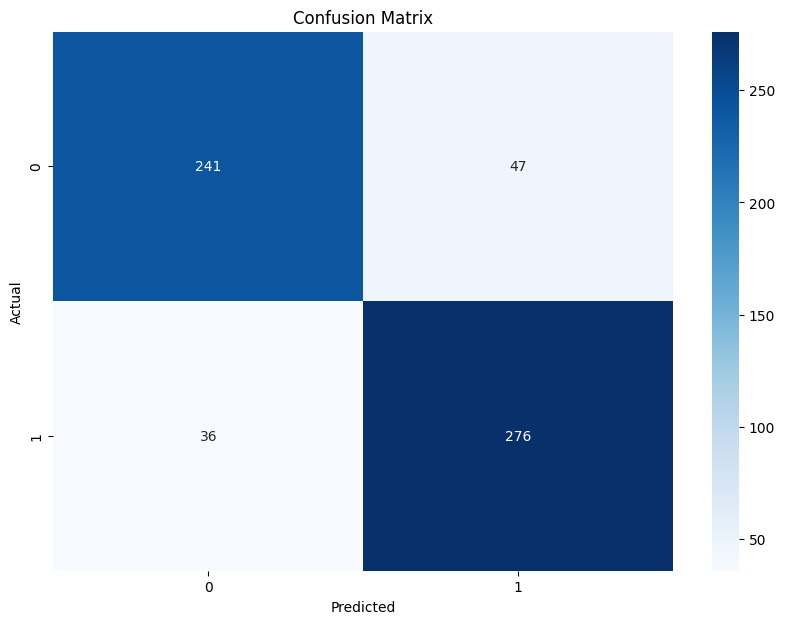

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [138]:
import json

# Misalkan ini adalah contoh parameter-model
coef_ = [0.1, 0.2, 0.3]
intercept_ = 0.5

# Ekstraksi parameter-model
model_parameters = {
    "coef_": coef_,
    "intercept_": intercept_,
}

# Simpan parameter-model ke dalam file JSON
with open("model_parameters.json", "w") as json_file:
    json.dump(model_parameters, json_file)
